In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sn
from datetime import datetime as dt
from matplotlib import pyplot as plt
#from fbprophet import Prophet
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 200)

In [3]:
# Reading File
df = pd.read_csv('State_University_of_New_York__SUNY__Trends_in_Enrollment_of_Students_by_Race_Ethnicity_and_by_SUNY_Sector__Beginning_Fall_2002.csv')

In [4]:
#look at data
df.head()

,Term,Institution Sector,Total Enrollment,White,Black or African American,Hispanic/Latino,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,Two or More Races,Asian,Non-resident Alien,Unknown
0,Fall 2019,Community Colleges,192959,109000,22626,31531,994,255,5243,8386,2607,12317
1,Fall 2019,Comprehensive Colleges,83674,51819,10215,11663,306,88,2293,2893,1635,2762
2,Fall 2019,Doctoral Degree Granting Institutions,112265,51837,9048,11151,220,59,2913,15890,16138,5009
3,Fall 2019,Technology Colleges,26674,16050,3336,4241,121,24,726,1234,351,591
4,Fall 2018,Community Colleges,199873,115352,24025,31057,1106,274,5393,8393,2670,11603


In [5]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Term                                       72 non-null     object
 1   Institution Sector                         72 non-null     object
 2   Total Enrollment                           72 non-null     int64 
 3   White                                      72 non-null     int64 
 4   Black or African American                  72 non-null     int64 
 5   Hispanic/Latino                            72 non-null     int64 
 6   American Indian or Alaska Native           72 non-null     int64 
 7   Native Hawaiian or Other Pacific Islander  72 non-null     int64 
 8   Two or More Races                          72 non-null     int64 
 9   Asian                                      72 non-null     int64 
 10  Non-resident Alien                      

In [6]:
# Looking at the Summary dataframe for object type (or categorical) columns only 
df.describe(include='O')

,Term,Institution Sector
count,72,72
unique,18,4
top,Fall 2013,Technology Colleges
freq,4,18


In [7]:
# Looking at a Summary dataframe for numeric columns only 
df.describe(exclude='O')

,Total Enrollment,White,Black or African American,Hispanic/Latino,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,Two or More Races,Asian,Non-resident Alien,Unknown
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,"109,061.81","68,240.24","10,372.08","9,657.24",479.01,80.40,"1,234.44","5,526.54","4,794.68","8,677.17"
std,"71,272.28","46,814.74","8,481.80","8,558.47",419.82,113.63,"1,557.47","4,502.43","5,136.83","6,472.53"
min,"23,223.00","16,050.00","2,108.00","1,215.00",101.00,0.00,0.00,551.00,351.00,444.00
25%,"69,800.50","42,927.75","4,800.00","3,913.25",200.25,0.00,0.00,"1,671.25","1,458.75","2,528.75"
50%,"93,014.50","52,982.00","6,733.00","6,469.50",298.50,51.50,522.00,"4,478.00","2,746.50","8,032.50"
75%,"132,438.50","78,795.25","12,570.25","11,772.00",584.50,89.00,"2,219.00","8,683.25","5,205.25","12,939.00"
max,"249,343.00","167,280.00","28,208.00","31,531.00","1,472.00",402.00,"5,393.00","15,890.00","16,850.00","25,289.00"


In [8]:
#Renaming columns

dataframe = df.rename(columns = {"Term ": 'Semester', "Institution Sector": 'Institution', "Total Enrollment":  'Total_Enrolled',  "Black or African American" : 'Black', "Hispanic/Latino" : 'Hisp_Latino', "American Indian or Alaska Native": 'AI_AN', "Native Hawaiian or Other Pacific Islander": 'NHPI', "Two or More Races": 'Mixed', "Non-resident Alien": 'NRA', "Unknown": 'Unk'})
print(dataframe)

     Semester                            Institution  Total_Enrolled   White  Black  Hisp_Latino  AI_AN  NHPI  Mixed  Asian    NRA    Unk
0   Fall 2019                     Community Colleges          192959  109000  22626        31531    994   255   5243   8386   2607  12317
1   Fall 2019                 Comprehensive Colleges           83674   51819  10215        11663    306    88   2293   2893   1635   2762
2   Fall 2019  Doctoral Degree Granting Institutions          112265   51837   9048        11151    220    59   2913  15890  16138   5009
3   Fall 2019                    Technology Colleges           26674   16050   3336         4241    121    24    726   1234    351    591
4   Fall 2018                     Community Colleges          199873  115352  24025        31057   1106   274   5393   8393   2670  11603
..        ...                                    ...             ...     ...    ...          ...    ...   ...    ...    ...    ...    ...
67  Fall 2003                    T

In [9]:
# Confirming the Summary for the new dataframe for object type (or categorical) columns only 

dataframe.describe(exclude='O')

,Total_Enrolled,White,Black,Hisp_Latino,AI_AN,NHPI,Mixed,Asian,NRA,Unk
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,"109,061.81","68,240.24","10,372.08","9,657.24",479.01,80.40,"1,234.44","5,526.54","4,794.68","8,677.17"
std,"71,272.28","46,814.74","8,481.80","8,558.47",419.82,113.63,"1,557.47","4,502.43","5,136.83","6,472.53"
min,"23,223.00","16,050.00","2,108.00","1,215.00",101.00,0.00,0.00,551.00,351.00,444.00
25%,"69,800.50","42,927.75","4,800.00","3,913.25",200.25,0.00,0.00,"1,671.25","1,458.75","2,528.75"
50%,"93,014.50","52,982.00","6,733.00","6,469.50",298.50,51.50,522.00,"4,478.00","2,746.50","8,032.50"
75%,"132,438.50","78,795.25","12,570.25","11,772.00",584.50,89.00,"2,219.00","8,683.25","5,205.25","12,939.00"
max,"249,343.00","167,280.00","28,208.00","31,531.00","1,472.00",402.00,"5,393.00","15,890.00","16,850.00","25,289.00"


In [10]:
# Confirming the  Summary dataframe for numeric columns only 
dataframe.describe(include='O')

,Semester,Institution
count,72,72
unique,18,4
top,Fall 2013,Technology Colleges
freq,4,18


In [11]:
#Looking at new columns
dataframe.columns

Index(['Semester', 'Institution', 'Total_Enrolled', 'White', 'Black', 'Hisp_Latino', 'AI_AN', 'NHPI', 'Mixed', 'Asian', 'NRA', 'Unk'], dtype='object')

In [12]:
dataframe.Institution.count()

72

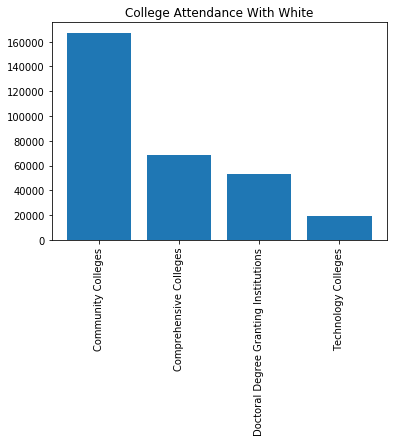

In [13]:
# Data Visualization By Whites

plt.bar(dataframe.Institution, dataframe.White)
plt.title('College Attendance With White')
plt.xticks(rotation=90)
plt.show()


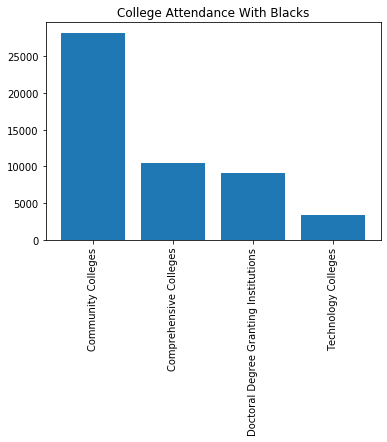

In [14]:
# Data Visualization By Blacks

plt.bar(dataframe.Institution, dataframe.Black)
plt.title('College Attendance With Blacks')
plt.xticks(rotation=90)
plt.show()



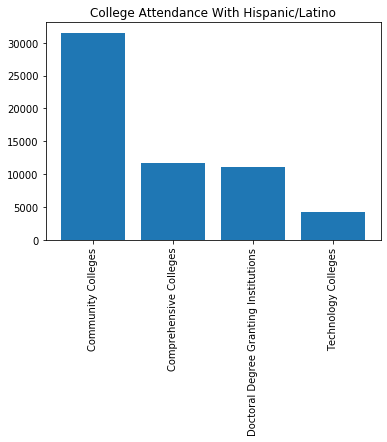

In [15]:
# Data Visualization By Hispanic/Latino

plt.bar(dataframe.Institution, dataframe.Hisp_Latino)
plt.title('College Attendance With Hispanic/Latino')
plt.xticks(rotation=90)
plt.show()



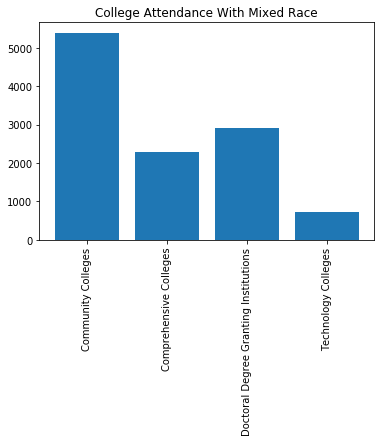

In [16]:
# Data Visualization By Mixed Race

plt.bar(dataframe.Institution, dataframe.Mixed)
plt.title('College Attendance With Mixed Race')
plt.xticks(rotation=90)
plt.show()


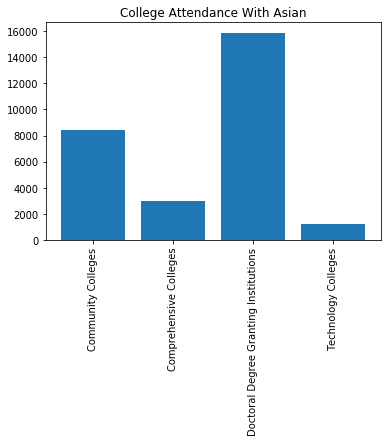

In [17]:
# Data Visualization By Asian

plt.bar(dataframe.Institution, dataframe.Asian)
plt.title('College Attendance With Asian')
plt.xticks(rotation=90)
plt.show()
         

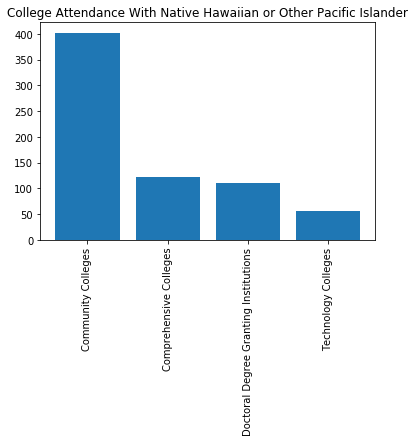

In [18]:
# Data Visualization By Native Hawaiian or Other Pacific Islander

plt.bar(dataframe.Institution, dataframe.NHPI)
plt.title('College Attendance With Native Hawaiian or Other Pacific Islander')
plt.xticks(rotation=90)
plt.show()


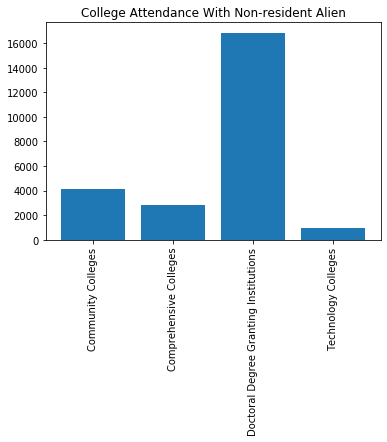

In [19]:
# Data Visualization By Non-resident Alien

plt.bar(dataframe.Institution, dataframe.NRA)
plt.title('College Attendance With Non-resident Alien')
plt.xticks(rotation=90)
plt.show()

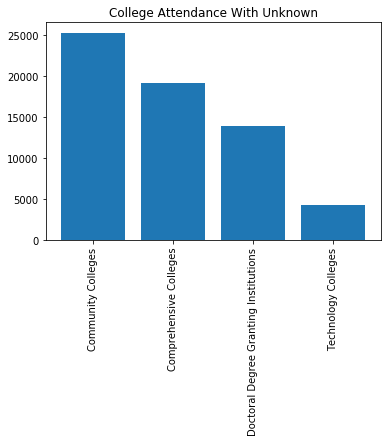

In [20]:
# Data Visualization By Non-resident Alien

plt.bar(dataframe.Institution, dataframe.Unk)
plt.title('College Attendance With Unknown')
plt.xticks(rotation=90)
plt.show()
          

Whites, Blacks, Hispanic/Latino, Mixed Race, Native Hawaiian or Other Pacific Islander attend more Community College

Asians and Non Resident Alien tend to obtain Doctoral Degrees


In [21]:
#Looking at new columns
dataframe.columns

Index(['Semester', 'Institution', 'Total_Enrolled', 'White', 'Black', 'Hisp_Latino', 'AI_AN', 'NHPI', 'Mixed', 'Asian', 'NRA', 'Unk'], dtype='object')

In [22]:
dataframe.Semester

0     Fall 2019
1     Fall 2019
2     Fall 2019
3     Fall 2019
4     Fall 2018
        ...    
67    Fall 2003
68    Fall 2002
69    Fall 2002
70    Fall 2002
71    Fall 2002
Name: Semester, Length: 72, dtype: object

In [23]:
#Splitting the Year and Semester
dataframe[['Semester_Term','Year']] = dataframe.Semester.str.split(expand=True) 
   
print("\n After adding two new columns : \n", dataframe) 


 After adding two new columns : 
      Semester                            Institution  Total_Enrolled   White  Black  Hisp_Latino  AI_AN  NHPI  Mixed  Asian    NRA    Unk Semester_Term  Year
0   Fall 2019                     Community Colleges          192959  109000  22626        31531    994   255   5243   8386   2607  12317          Fall  2019
1   Fall 2019                 Comprehensive Colleges           83674   51819  10215        11663    306    88   2293   2893   1635   2762          Fall  2019
2   Fall 2019  Doctoral Degree Granting Institutions          112265   51837   9048        11151    220    59   2913  15890  16138   5009          Fall  2019
3   Fall 2019                    Technology Colleges           26674   16050   3336         4241    121    24    726   1234    351    591          Fall  2019
4   Fall 2018                     Community Colleges          199873  115352  24025        31057   1106   274   5393   8393   2670  11603          Fall  2018
..        ...    

In [24]:
#Looking at columns
dataframe.columns

Index(['Semester', 'Institution', 'Total_Enrolled', 'White', 'Black', 'Hisp_Latino', 'AI_AN', 'NHPI', 'Mixed', 'Asian', 'NRA', 'Unk', 'Semester_Term', 'Year'], dtype='object')

In [25]:
#Dropping Semester after the split
dataframe.drop(['Semester'], axis=1)


,Institution,Total_Enrolled,White,Black,Hisp_Latino,AI_AN,NHPI,Mixed,Asian,NRA,Unk,Semester_Term,Year
0,Community Colleges,192959,109000,22626,31531,994,255,5243,8386,2607,12317,Fall,2019
1,Comprehensive Colleges,83674,51819,10215,11663,306,88,2293,2893,1635,2762,Fall,2019
2,Doctoral Degree Granting Institutions,112265,51837,9048,11151,220,59,2913,15890,16138,5009,Fall,2019
3,Technology Colleges,26674,16050,3336,4241,121,24,726,1234,351,591,Fall,2019
4,Community Colleges,199873,115352,24025,31057,1106,274,5393,8393,2670,11603,Fall,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Technology Colleges,23809,17841,2122,1239,117,0,0,606,550,1334,Fall,2003
68,Community Colleges,198522,145595,18700,12099,1104,0,0,6003,4119,10902,Fall,2002
69,Comprehensive Colleges,88899,68727,5414,3699,388,0,0,1817,1867,6987,Fall,2002
70,Doctoral Degree Granting Institutions,92295,51827,6129,4320,285,0,0,9554,8464,11716,Fall,2002


In [26]:
dataframe.columns

Index(['Semester', 'Institution', 'Total_Enrolled', 'White', 'Black', 'Hisp_Latino', 'AI_AN', 'NHPI', 'Mixed', 'Asian', 'NRA', 'Unk', 'Semester_Term', 'Year'], dtype='object')

In [27]:
dataframe['Year'].count()

72

In [28]:
#Dropping Semester after the split
df2 = dataframe.drop(['Semester'], axis=1)


In [29]:
df2.sort_index()

,Institution,Total_Enrolled,White,Black,Hisp_Latino,AI_AN,NHPI,Mixed,Asian,NRA,Unk,Semester_Term,Year
0,Community Colleges,192959,109000,22626,31531,994,255,5243,8386,2607,12317,Fall,2019
1,Comprehensive Colleges,83674,51819,10215,11663,306,88,2293,2893,1635,2762,Fall,2019
2,Doctoral Degree Granting Institutions,112265,51837,9048,11151,220,59,2913,15890,16138,5009,Fall,2019
3,Technology Colleges,26674,16050,3336,4241,121,24,726,1234,351,591,Fall,2019
4,Community Colleges,199873,115352,24025,31057,1106,274,5393,8393,2670,11603,Fall,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Technology Colleges,23809,17841,2122,1239,117,0,0,606,550,1334,Fall,2003
68,Community Colleges,198522,145595,18700,12099,1104,0,0,6003,4119,10902,Fall,2002
69,Comprehensive Colleges,88899,68727,5414,3699,388,0,0,1817,1867,6987,Fall,2002
70,Doctoral Degree Granting Institutions,92295,51827,6129,4320,285,0,0,9554,8464,11716,Fall,2002


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Institution     72 non-null     object
 1   Total_Enrolled  72 non-null     int64 
 2   White           72 non-null     int64 
 3   Black           72 non-null     int64 
 4   Hisp_Latino     72 non-null     int64 
 5   AI_AN           72 non-null     int64 
 6   NHPI            72 non-null     int64 
 7   Mixed           72 non-null     int64 
 8   Asian           72 non-null     int64 
 9   NRA             72 non-null     int64 
 10  Unk             72 non-null     int64 
 11  Semester_Term   72 non-null     object
 12  Year            72 non-null     object
dtypes: int64(10), object(3)
memory usage: 7.4+ KB


In [31]:
# Correllation
corrMatrix = df2.corr()
print (corrMatrix)

                Total_Enrolled  White  Black  Hisp_Latino  AI_AN  NHPI  Mixed  Asian   NRA  Unk
Total_Enrolled            1.00   0.98   0.97         0.87   0.96  0.61   0.53   0.49  0.13 0.86
White                     0.98   1.00   0.95         0.81   0.98  0.54   0.41   0.34 -0.01 0.84
Black                     0.97   0.95   1.00         0.94   0.96  0.72   0.63   0.35 -0.04 0.77
Hisp_Latino               0.87   0.81   0.94         1.00   0.84  0.84   0.84   0.40  0.01 0.64
AI_AN                     0.96   0.98   0.96         0.84   1.00  0.57   0.43   0.25 -0.12 0.82
NHPI                      0.61   0.54   0.72         0.84   0.57  1.00   0.88   0.24 -0.05 0.41
Mixed                     0.53   0.41   0.63         0.84   0.43  0.88   1.00   0.38  0.12 0.24
Asian                     0.49   0.34   0.35         0.40   0.25  0.24   0.38   1.00  0.90 0.43
NRA                       0.13  -0.01  -0.04         0.01  -0.12 -0.05   0.12   0.90  1.00 0.14
Unk                       0.86   0.84   

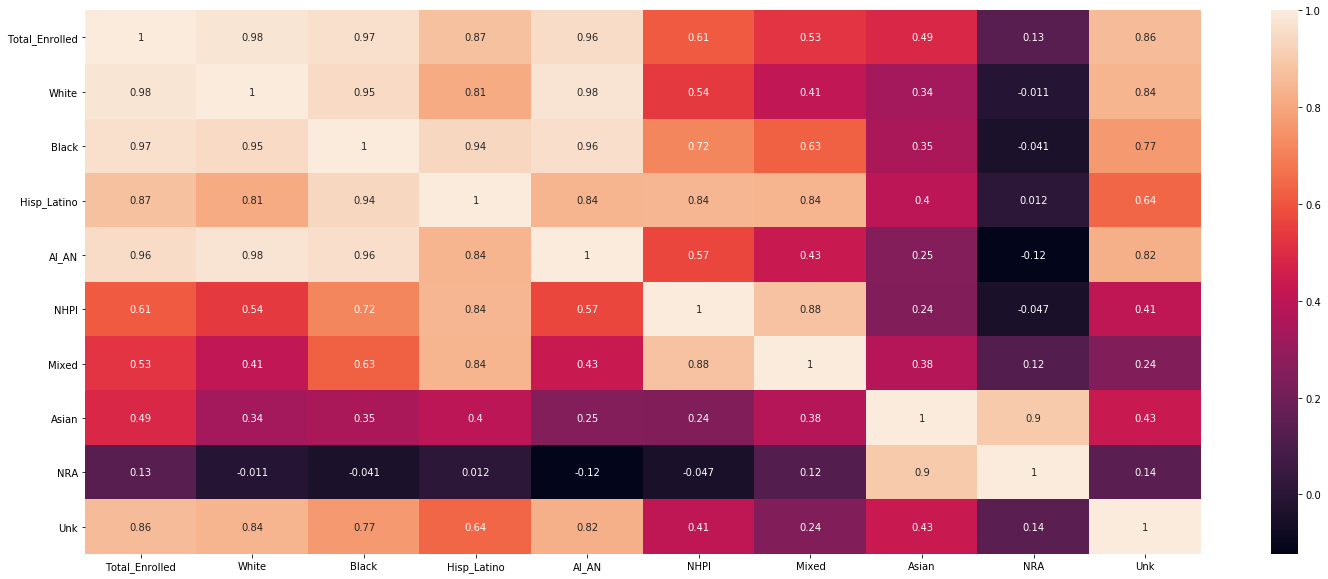

In [32]:
# Correlation Matrix
plt.figure(figsize=(25,10))

sn.heatmap(corrMatrix, annot=True)

plt.show()

In [33]:
df2.sort_values(by=['Institution', 'Year'],ascending=[True,False])

,Institution,Total_Enrolled,White,Black,Hisp_Latino,AI_AN,NHPI,Mixed,Asian,NRA,Unk,Semester_Term,Year
0,Community Colleges,192959,109000,22626,31531,994,255,5243,8386,2607,12317,Fall,2019
4,Community Colleges,199873,115352,24025,31057,1106,274,5393,8393,2670,11603,Fall,2018
8,Community Colleges,209418,120742,25454,30861,1071,305,5227,8359,2846,14553,Fall,2017
12,Community Colleges,216277,126024,26125,30097,1143,346,4922,8134,3099,16387,Fall,2016
16,Community Colleges,222998,130503,26466,29222,1108,389,4621,8054,3284,19351,Fall,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Technology Colleges,24321,17808,2159,1308,116,0,0,590,514,1826,Fall,2006
59,Technology Colleges,24426,18144,2182,1243,125,0,0,650,493,1589,Fall,2005
63,Technology Colleges,24381,18198,2151,1216,140,0,0,630,533,1513,Fall,2004
67,Technology Colleges,23809,17841,2122,1239,117,0,0,606,550,1334,Fall,2003


In [34]:
# convert year to time
df2.Year = pd.to_datetime(df2.Year, format='%Y')

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Institution     72 non-null     object        
 1   Total_Enrolled  72 non-null     int64         
 2   White           72 non-null     int64         
 3   Black           72 non-null     int64         
 4   Hisp_Latino     72 non-null     int64         
 5   AI_AN           72 non-null     int64         
 6   NHPI            72 non-null     int64         
 7   Mixed           72 non-null     int64         
 8   Asian           72 non-null     int64         
 9   NRA             72 non-null     int64         
 10  Unk             72 non-null     int64         
 11  Semester_Term   72 non-null     object        
 12  Year            72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 7.4+ KB


Text(0.5, 1.0, 'Ennrollment By Institution')

<Figure size 5040x1440 with 0 Axes>

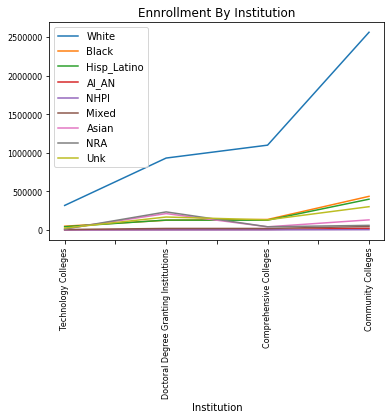

In [37]:
Total_By_Institution = df2.groupby(["Institution"])[["White", "Black", "Hisp_Latino","AI_AN", "NHPI", "Mixed", "Asian", "NRA", "Unk"]].sum().sort_values(by='Institution',ascending=False)
plt.figure(figsize=(70,20))
#Total_By_Institution

Total_By_Institution.plot(kind="line", fontsize=8)
plt.xticks(rotation=90)

plt.title('Ennrollment By Institution')



Whites more colleges than other races but have a higher enrollment in Community College.

Text(0.5, 1.0, 'Ennrollment By Year')

<Figure size 1080x648 with 0 Axes>

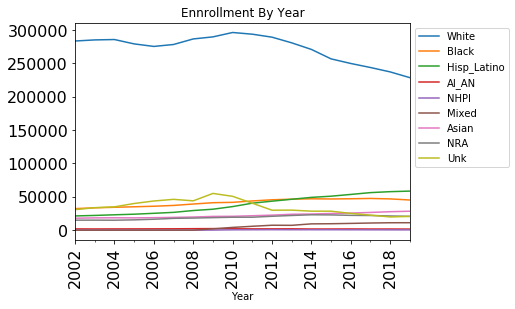

In [38]:
Total_By_Institution = df2.groupby(["Year"])[["White", "Black", "Hisp_Latino","AI_AN", "NHPI", "Mixed", "Asian", "NRA", "Unk"]].sum().sort_values(by='Year',ascending=False)

Total_By_Institution
plt.figure(figsize=(15,9))
Total_By_Institution.plot(kind="line", fontsize=16)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc = "best")

plt.title('Ennrollment By Year')

More whites are enrolled in colleges but seems to be going on a downward trend.

In [39]:
df2.head()

,Institution,Total_Enrolled,White,Black,Hisp_Latino,AI_AN,NHPI,Mixed,Asian,NRA,Unk,Semester_Term,Year
0,Community Colleges,192959,109000,22626,31531,994,255,5243,8386,2607,12317,Fall,2019-01-01
1,Comprehensive Colleges,83674,51819,10215,11663,306,88,2293,2893,1635,2762,Fall,2019-01-01
2,Doctoral Degree Granting Institutions,112265,51837,9048,11151,220,59,2913,15890,16138,5009,Fall,2019-01-01
3,Technology Colleges,26674,16050,3336,4241,121,24,726,1234,351,591,Fall,2019-01-01
4,Community Colleges,199873,115352,24025,31057,1106,274,5393,8393,2670,11603,Fall,2018-01-01


# Percentage of Enrollments By Race

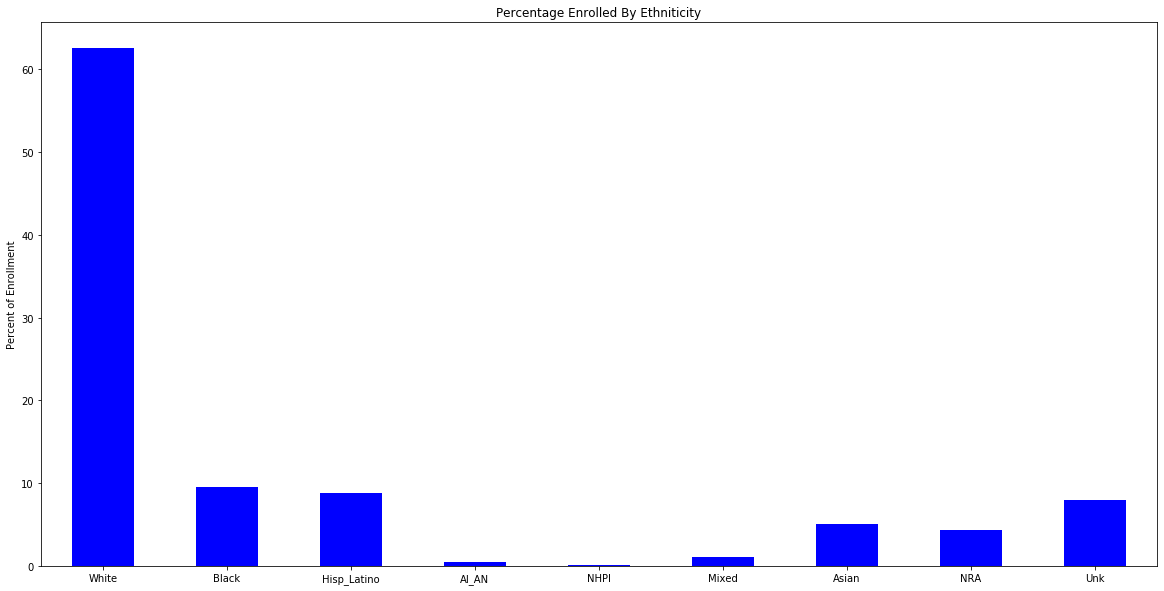

In [53]:
df4 = pd.DataFrame([np.sum(df2['White'])/np.sum(df2['Total_Enrolled'])*100,
                    np.sum(df2['Black'])/np.sum(df2['Total_Enrolled'])*100,                  
                    np.sum(df2['Hisp_Latino'])/np.sum(df2['Total_Enrolled'])*100,
                    np.sum(df2['AI_AN'])/np.sum(df2['Total_Enrolled'])*100,
                    np.sum(df2['NHPI'])/np.sum(df2['Total_Enrolled'])*100,
                    np.sum(df2['Mixed'])/np.sum(df2['Total_Enrolled'])*100,
                    np.sum(df2['Asian'])/np.sum(df2['Total_Enrolled'])*100,
                    np.sum(df2['NRA'])/np.sum(df2['Total_Enrolled'])*100,
                    np.sum(df2['Unk'])/np.sum(df2['Total_Enrolled'])*100],               
                    index = ['White','Black','Hisp_Latino','AI_AN','NHPI','Mixed','Asian','NRA','Unk'])

df4.plot.bar(color='b', figsize=(20,10), legend=False, rot=0)
plt.title('Percentage Enrolled By Ethniticity')

plt.ylabel('Percent of Enrollment');

#### White Enrollment is greater than 65%   
#### Black Enrollment is greater than 9%
#### Hispanic Enrollment is greater than 8%
####  Asian Enrollment is around 5%
